In [6]:
import pandas as pd

# Load the dataset
df = pd.read_csv('flight_dataset.csv')
df.rename(columns={'Date': 'Day'}, inplace=True)

# Display the first few rows of the dataset
print(df.head())


       Airline    Source Destination  Total_Stops  Price  Day  Month  Year  \
0       IndiGo  Banglore   New Delhi            0   3897   24      3  2019   
1    Air India   Kolkata    Banglore            2   7662    1      5  2019   
2  Jet Airways     Delhi      Cochin            2  13882    9      6  2019   
3       IndiGo   Kolkata    Banglore            1   6218   12      5  2019   
4       IndiGo  Banglore   New Delhi            1  13302    1      3  2019   

   Dep_hours  Dep_min  Arrival_hours  Arrival_min  Duration_hours  \
0         22       20              1           10               2   
1          5       50             13           15               7   
2          9       25              4           25              19   
3         18        5             23           30               5   
4         16       50             21           35               4   

   Duration_min  
0            50  
1            25  
2             0  
3            25  
4            45  


In [7]:
print(df.isnull().sum())

# Get summary statistics
print(df.describe())

# Check the data types
print(df.dtypes)

Airline           0
Source            0
Destination       0
Total_Stops       0
Price             0
Day               0
Month             0
Year              0
Dep_hours         0
Dep_min           0
Arrival_hours     0
Arrival_min       0
Duration_hours    0
Duration_min      0
dtype: int64
        Total_Stops         Price           Day         Month     Year  \
count  10683.000000  10683.000000  10683.000000  10683.000000  10683.0   
mean       0.824207   9087.064121     13.508378      4.708602   2019.0   
std        0.675199   4611.359167      8.479277      1.164357      0.0   
min        0.000000   1759.000000      1.000000      3.000000   2019.0   
25%        0.000000   5277.000000      6.000000      3.000000   2019.0   
50%        1.000000   8372.000000     12.000000      5.000000   2019.0   
75%        1.000000  12373.000000     21.000000      6.000000   2019.0   
max        4.000000  79512.000000     27.000000      6.000000   2019.0   

          Dep_hours       Dep_min  Arriv

In [8]:
# Convert 'Year', 'Month', and 'Day' columns to datetime
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])

# One-hot encode categorical variables
df = pd.get_dummies(df, columns=['Airline', 'Source', 'Destination'])

# Calculate total duration in minutes
df['Duration_Minutes'] = df['Duration_hours'] * 60 + df['Duration_min']

# Drop unnecessary columns
df = df.drop(columns=['Date', 'Year', 'Month', 'Day', 'Dep_hours', 'Dep_min', 'Arrival_hours', 'Arrival_min', 'Duration_hours', 'Duration_min'])

print(df.head())


   Total_Stops  Price  Airline_Air Asia  Airline_Air India  Airline_GoAir  \
0            0   3897             False              False          False   
1            2   7662             False               True          False   
2            2  13882             False              False          False   
3            1   6218             False              False          False   
4            1  13302             False              False          False   

   Airline_IndiGo  Airline_Jet Airways  Airline_Jet Airways Business  \
0            True                False                         False   
1           False                False                         False   
2           False                 True                         False   
3            True                False                         False   
4            True                False                         False   

   Airline_Multiple carriers  Airline_Multiple carriers Premium economy  ...  \
0                      F

In [9]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = df.drop(columns=['Price'])
y = df['Price']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')


MAE: 1785.3058989941935
RMSE: 3025.6017550084443


In [12]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, None]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(best_params)

# Train the model with the best parameters
model = RandomForestRegressor(**best_params)
model.fit(X_train, y_train)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
{'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 300}


RandomForestRegressor(max_depth=10, max_features='sqrt', n_estimators=300)

In [13]:
import joblib

# Save the trained model
joblib.dump(model, 'flight_price_predictor.pkl')


['flight_price_predictor.pkl']

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R²: {r2}')


MAE: 1826.5741732027122
MSE: 7958965.708793628
RMSE: 2821.163892579378
R²: 0.6239378910429896


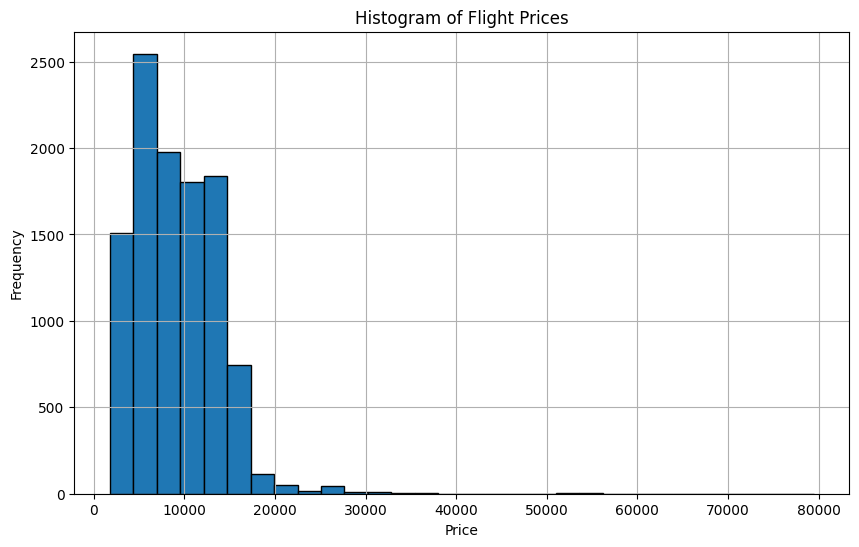

In [15]:
import matplotlib.pyplot as plt

# Plotting histogram of prices
plt.figure(figsize=(10, 6))
plt.hist(df['Price'], bins=30, edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Flight Prices')
plt.grid(True)
plt.show()


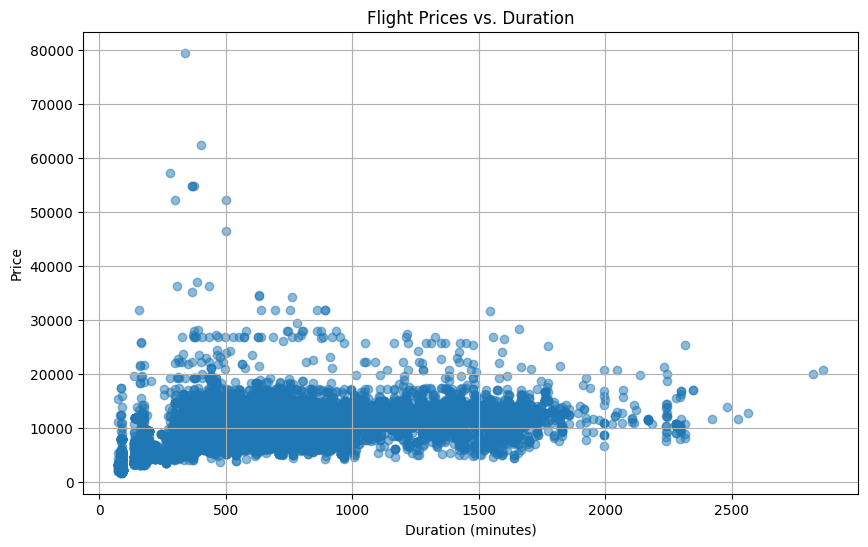

In [21]:
import matplotlib.pyplot as plt

# Assuming Duration_Minutes is already calculated in your dataset
plt.figure(figsize=(10, 6))
plt.scatter(df['Duration_Minutes'], df['Price'], alpha=0.5)
plt.xlabel('Duration (minutes)')
plt.ylabel('Price')
plt.title('Flight Prices vs. Duration')
plt.grid(True)
plt.show()


In [18]:
print(df.columns)

Index(['Total_Stops', 'Price', 'Airline_Air Asia', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Banglore', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi', 'Duration_Minutes'],
      dtype='object')


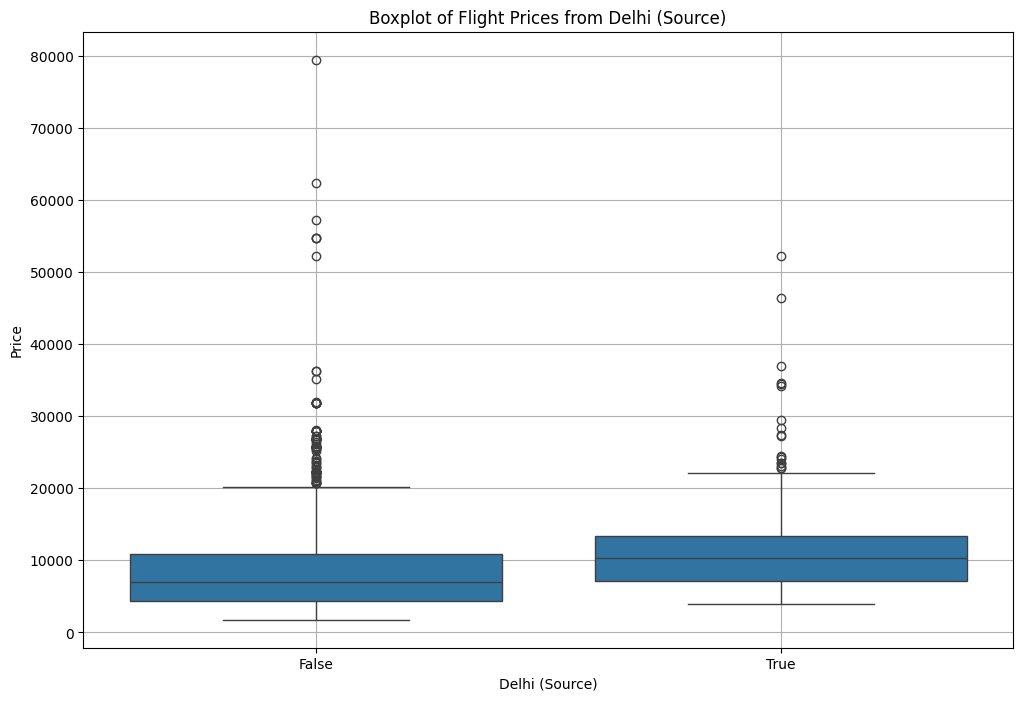

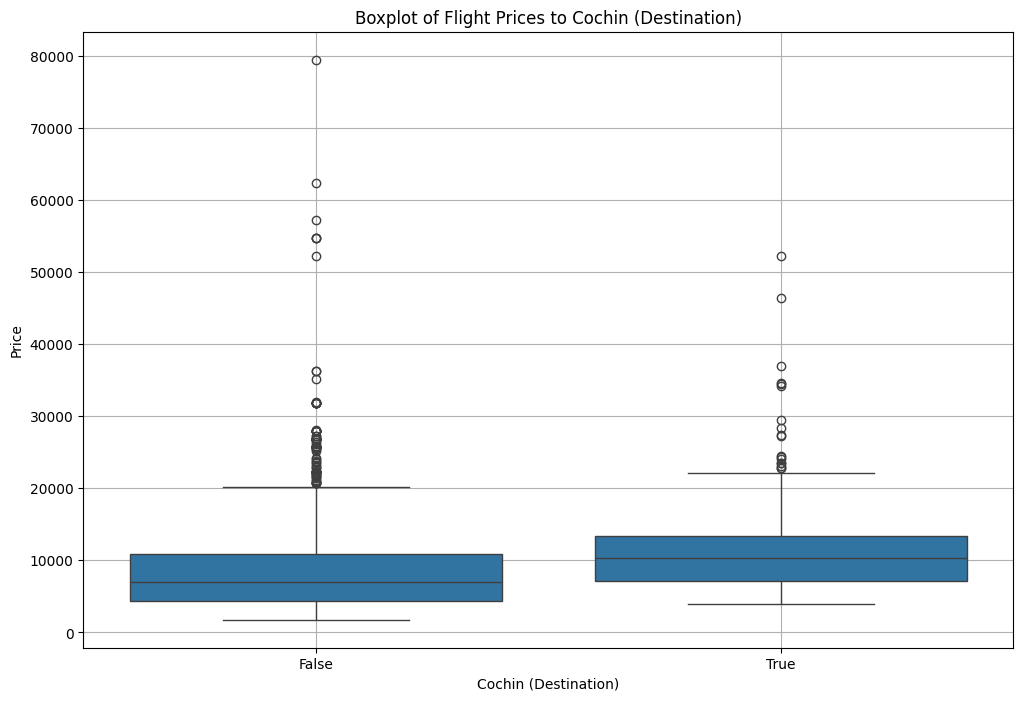

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot of prices by source city
plt.figure(figsize=(12, 8))
sns.boxplot(x='Source_Delhi', y='Price', data=df)
plt.xlabel('Delhi (Source)')
plt.ylabel('Price')
plt.title('Boxplot of Flight Prices from Delhi (Source)')
plt.grid(True)
plt.show()

# Boxplot of prices by destination city
plt.figure(figsize=(12, 8))
sns.boxplot(x='Destination_Cochin', y='Price', data=df)
plt.xlabel('Cochin (Destination)')
plt.ylabel('Price')
plt.title('Boxplot of Flight Prices to Cochin (Destination)')
plt.grid(True)
plt.show()
